# Problem Set 3

Due in your git fork by 11:59pm Pacfic time on Wednesday, November 1st.

All problems have equal weight.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

## Problem 1: Importance Sampling

(a) Estimate the integral $$\int_0^{\pi} \sin(x)\mathrm{d}x$$ and the uncertainty on the estimate by using uniform sampling over the interval. 

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

def ff(x):
    return 1./(1+pow(x,2))


def monte2(a,b,N,f):    # Random sampling monte carlo function 
    xval=[]
    for i in range(N):
        xval = np.append(xval, random.uniform(a, b))   # gen list of random numbers between a and b
    y = f(xval)    # calc's the y values
    sum = np.sum(y)   # sums all the the values of f(x)
    sum2= np.sum(y**2)    # sums all values of f(x)^2
    return (b-a)*sum/N , (b-a)*np.sqrt((sum2/N + (sum/N)**2)/N)

p1a_ans, p1a_err = monte2(0,np.pi,1000,np.sin)
# print(monte2(0,np.pi,1000,np.sin))
print(f"Using uniform sampling the integral comes out to {p1a_ans}", u"\u00B1", p1a_err)


Using uniform sampling the integral comes out to 1.9867814125090992 ± 0.09376566770683427


(b) Plot the uncertainty estimate (from uniform sampling) as a function of $N$, the number of points evaluated. How does the uncertainty change with $N$? 

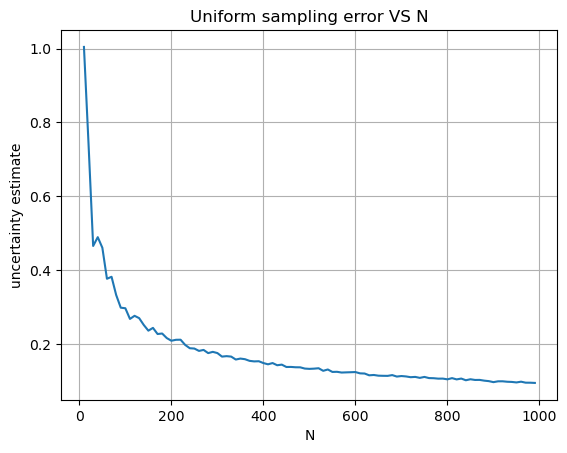

In [3]:
nval = np.arange(10,1000,10)

sig = []
for i in range(len(nval)):
    sig = np.append(sig, monte2(0,np.pi,nval[i],np.sin)[1])
plt.plot(nval,sig)
plt.xlabel("N")
plt.ylabel("uncertainty estimate")
plt.grid()
plt.title("Uniform sampling error VS N")
plt.show()

The error seems to fall off like 1/sqrt(N) with some shifting. It can be seen that the error decreases quiet substantually for higher values of N while having roughly 40% error with values like N=10.

(c) Estimate the same integral and the uncertainty on the estimate by using importance sampling. (It may be helpful to note that $$\sin x \approx \frac{4}{\pi^2}x(\pi − x)$$ over the interval $[0,\pi]$.)

taking the approximation to be the weight function we must then nomalize and solve for $y^{-1}(x)$

$$y(x) = \int_{0}^{\pi} A \frac{4}{\pi^2}t(\pi − t) dt = 1 $$

$$ A \frac{2}{3\pi^{2}}(3pi^3-2pi^3) = 1 $$

$$ A * \frac{2}{3}\pi=1$$

$$ A = \frac{3}{2\pi}$$

$$ w(x) = \frac{6}{\pi^3} x(\pi-x)$$

$$y(x) = \int_{0}^{x} \frac{6}{\pi^3}t(\pi − t) dt $$

$$y(x) = \frac{6}{\pi^3}(\frac{\pi x^2}{2}-\frac{x^3}{3})$$

$$x(y) = \frac{\pi}{4}(-(1+i\sqrt3) \sqrt[3]{-2y + 2\sqrt{(y-1)y}+1}-\frac{i(\sqrt{3}+i)}{\sqrt[3]{-2y + 2\sqrt{(y-1)y}+1}}+2)$$



Using Importance sampling the integral comes out to 1.9997415344451628 ± 0.0009861282510258732


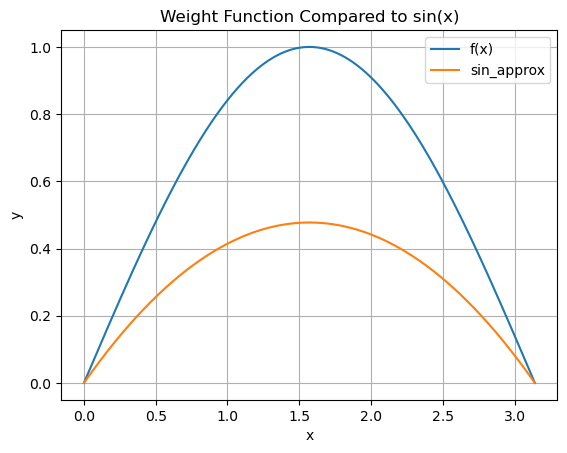

In [4]:


def sinapprox(x):
    return 6/(np.pi**3)*x*(np.pi-x)


def weightinv(x):
    a = (-2*x + 2*((x-1)*x)**(1/2) +1)**(1/3)
    b1 = (3)**(1/2)
    z1 = complex(-1,b1)    # creates a complex number -1 + i sqrt(3)
    z2 = complex(1,b1)     # creates a complex number  1 + i sqrt(3)
    return 1/4 *np.pi*(-z2*a+z1/a+2)


def montev2(a,b,N,f,weight,inverseweight):
    xval = []
    for i in range(N):
        yval = random.uniform(0,1)      # since inverse is normailzed gens num from 0 through 1
        xval = np.append(xval,inverseweight(yval))   # makes takes random num through inverse function and saves as a value x
    sum = np.sum(f(xval)/weight(xval))     # sums all f(x)/w(x)
    sum2 = np.sum((f(xval)/weight(xval))**2) # sums all (f(x)/w(x))^2
    approx =sum/(N)      # (b-a) * sum/N but b-a is always 1 because weight is normalized
    err = np.sqrt((sum2/N - ((sum/N)**2))/N) 
    if np.iscomplexobj(approx)==True:  #checks for complex number
        approx = approx.real   # takes just the real part of the number
    if np.iscomplexobj(err)==True:
        err = err.real
    return  approx, err
                  


p1b_ans, p1b_err = montev2(0,np.pi,10000,np.sin, sinapprox, weightinv)
print(f"Using Importance sampling the integral comes out to {p1b_ans}", u"\u00B1", p1b_err)



x = np.linspace(0,np.pi,1000)
y1 = np.sin(x)
y2 = sinapprox(x)
plt.plot(x,y1,label="f(x)")
plt.plot(x,y2,label="sin_approx")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Weight Function Compared to sin(x)")
plt.grid()
plt.legend()
plt.show()

(d) Plot the uncertainty estimate (from importance sampling) as a function of $N$, the number of points evaluated. How does the uncertainty change with $N$, and how does it compare to part (b)?

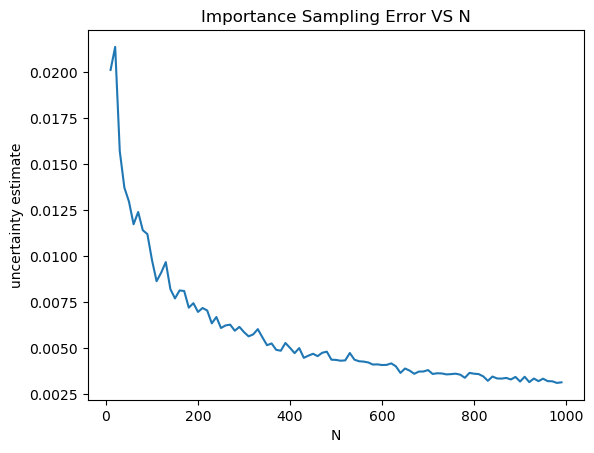

In [5]:
nval = np.arange(10,1000,10)
sig = []
for i in range(len(nval)):
    sig = np.append(sig, montev2(0,np.pi,nval[i],np.sin,sinapprox,weightinv)[1])
plt.plot(nval,sig)
plt.xlabel("N")
plt.ylabel("uncertainty estimate")
plt.title("Importance Sampling Error VS N")
plt.show()

While the graphs both follow the same shape of 1/sqrt(N), the inital error for N=10 of the uniform sampling starts around .8 while it is .04 for importance sampling. The graph is a bit smoother for the random sampling but this could be due to the nature of our inverse weight function being negative over the region leading to slightly more complex math occuring. 

## Problem 2: Acceptance/rejection

Use the von Neumann (acceptance/rejection) method to estimate the following integrals numerically, including uncertainties. (Each of these integrals presents a new wrinkle in the calculation.)

(a) $\int_1^2 x^2 \mathrm{d}x$

if we want to use the function as we can normalize just normailze the function so it will share the shape of the function.

$$ \int_1^2 A x^2 dx = 1 $$
$$ A \frac{2^3 - 1 }{3} = 1 $$
$$ A = \frac{3}{7} $$
$$ w(x) =  \frac{3x^2}{7} $$

this won't work if you can't solve the function so another function you can use is the taylor series approximation for the weight and then normalize it. I did one around both x=1 and x=3/2 only to the second term as the third term will just return $x^2$ in both instances

around x=1 
$$ x^2 \approx 2x-1 $$
$$ \int_1^2 2x-1 = 2 $$
$$ w(x) = x-\frac{1}{2} $$

around x=3/2 
$$ x^2 \approx 3x-\frac{9}{4} $$
$$ \int_1^2 2x-1 = \frac{9}{4} $$
$$ w(x) = \frac{4}{9}(3x-\frac{9}{4}) $$

These results still seemed off so I took the average slope of the function, which is 3 in this case, and then tried to shift it for better graphing agreement.

I found 3 results in this case that work for the function. After weighting the 3 functions are.

$$ w_1(x) = \frac{2}{5}(3x-2) $$

$$ w_2(x) = \frac{2}{5}(3x-2.1) $$

$$ w_3(x) = \frac{2}{5}(3x-2.2) $$

with the best solution being $w_2(x)$

In [27]:
def func2a(x):
    return x**2

def w2a(x):
    return (3/7)*x**2

def w2aa(x):
    return x-1/2

def w2aaa(x):
    return (4/9)*(3*x-9/4)

def test(x):
    return 2/5 * (3*x-2)

def test2(x):
    return 5/12 * (3*x-2.1)

def test3(x):
    return 1/2.3 * (3*x-2.2)


def mm(a,b,N,w):   #finds the min and max in the range 
    x=np.linspace(a,b,N) 
    wrange = w(x)   # generates a range of w between a and b  
    return np.min(wrange), np.max(wrange)

def von(a,b,N,f,w, maxcount=10000):
    xval = []
    xval_rej = []
    fval = []
    fval_rej = []
    wval = []
    wavl_rej = []
    count = 0
    while len(xval) < N:  
        x = random.uniform(a,b)
        y = random.uniform(mm(a,b,N,w)[0], mm(a,b,N,w)[1])
#         print(mm(a,b,N,w)[0], mm(a,b,N,w)[1])
        if y<w(x):
#             print(w(x))
#             print(f(x))
            xval = np.append(xval, x)
            fval = np.append(fval,f(x))
            wval = np.append(wval,w(x))
        else:
            xval_rej = np.append(xval_rej, x)
            fval_rej = np.append(fval,f(x))
            wval_rej = np.append(wval,w(x))
        count+=1
#         if count == maxcount:
#             raise Exception("max iterations occured before xval array filled.\n check maxcount desired or weight function.")
#     print(np.sum(fval))
#     print(np.sum(wval))
    sum = np.sum(fval/wval)
    sum2 = np.sum((fval/wval)**2)
#     print(sum, sum2)
#     print(sum2/N, (sum/N) **2)
    sigma = (b-a)*np.sqrt((sum2/N - (sum/N)**2)/N)  
    return (b-a)*sum/N, sigma


calc2a, err2a = von(1,2,80,func2a,w2a)
print(f"integral approx for normalizing the origonal function = {calc2a}", u"\u00B1", f"{err2a}" )
print()
calc2a, err2a = von(1,2,1000,func2a,w2aa)
print(f"integral approx for taylor expansion around x=1 = {calc2a}", u"\u00B1", f"{err2a}" )
print()
calc2a, err2a = von(1,2,1000,func2a,w2aaa)
print(f"integral approx for taylor expansion around x=3/2 = {calc2a}", u"\u00B1", f"{err2a}" )
print()
calc2a, err2a = von(1,2,100,func2a,test)
print(f"integral approx for w1 = {calc2a}", u"\u00B1", f"{err2a}" )
print()
calc2a, err2a = von(1,2,1000,func2a,test2)
print(f"integral approx for w2 = {calc2a}", u"\u00B1", f"{err2a}" )
print()
calc2a, err2a = von(1,2,100,func2a,test3)
print(f"integral approx for w3 = {calc2a}", u"\u00B1", f"{err2a}" )



def weighttest(x):
    return (3/8)*x**2

def testfunc(x):
    return 3*x**3

def www(x):
    return (3*x**3)/192
    

# print(von(0,2,100,func2a,weighttest))     
# print(von(0,4,100,testfunc,www))

# check if a-->b has any values where trial_y < w(trial_x)

integral approx for normalizing the origonal function = 2.333333333333333 ± 4.712160915387242e-09

integral approx for taylor expansion around x=1 = 2.391430293847088 ± 0.005557962387479297

integral approx for taylor expansion around x=3/2 = 2.315916296142997 ± 0.0020325400185318807

integral approx for w1 = 2.3486724741308773 ± 0.008649105546760221

integral approx for w2 = 2.333956656599959 ± 0.0022225012886838594

integral approx for w3 = 2.3266198255305297 ± 0.006984939940509845


As seen above the best solution is clearly for $w_2$ 

(b) $4\int_0^1 \sqrt{1-x^2}\mathrm{d}x$

same process as part a)

$$ 4A \int_{0}^{1} \sqrt{1-x^2}dx = 1 $$
$$ -4A \int_{\frac{\pi}{2}}^0 \sqrt{1-cos^2(\theta)} sin(\theta) d\theta = 1$$
$$ 4A \int_{0}^{\frac{\pi}{2}} sin^2(\theta) d\theta = 1$$
$$ 2A \int_{0}^{\frac{\pi}{2}} (1-cos(2\theta) d\theta = 1$$
$$ 2A (\frac{\pi}{2}) = 1$$
$$ A = \frac{1}{\pi} $$

once agian this is a nice test for comparing answers but will not suffice for a test of the function. After attempting to use a weighting function of the binomial expansion and not getting close enough. I began graphing functions and attempting to match the graph shape at bare minimum before checking a function. The final weighting function I found that worked relativly well is:
$$  w_1(x) = \frac{3}{8}(5-4x-x^2) $$

while this function works well I thought I find a systematic way of finding weight functions. I found 1 extra solution using the average slope of the function evaluated of the region and shifting, this solution is $w_1$. $w_2$ was found by taking the slope from start to end and then shifting. Post normalizing the functions are:

$$ w_1(x) = \frac{1}{4.194} (-4.412x+6.4) $$

$$ w_2(x) = \frac{1}{4}(-4x+6) $$

In [25]:
def func2b(x):
    return 4*np.sqrt(1-x**2)

def w2b(x):
    return 4/np.pi*np.sqrt(1-x**2)

def w2bbb(x):
    return (3/8)*(5-4*x-x**2)

def w2bb(x):
    return (1/4.194) * (-4.412*x+6.4)

def test3(x):
    return (-4*x+6)/4


calc2b, err2b = von(0,1,100,func2b,w2b)
print(f" The integral evaluates to = {calc2b}", u"\u00B1", f"{err2b}" )
print()
calc2b, err2b = von(0,1,1000,func2b,w2bbb)
print(f"The approximation of the integral is = {calc2b}", u"\u00B1", f"{err2b}" )
print()
calc2b, err2b = von(0,1,1000,func2b,w2bb)
print(f"The approximation of the integal using w1 = {calc2b}", u"\u00B1", f"{err2b}" )
print()
calc2b, err2b = von(0,1,1000,func2b,test3)
print(f"The approximation of the integral using w2 = {calc2b}", u"\u00B1", f"{err2b}" )

# calc2b, err2b = von(0,1,2000,func2b,w2bbbb)
# print(f"integral approx = {calc2b}", u"\u00B1", f"{err2b}" )
# print(np.pi-von(0,1,100,func2b,w2b)[0])


 The integral evaluates to = 3.1415926535897927 ± 4.214684851089403e-09

The approximation of the integral is = 3.1451542258507534 ± 0.038164340544059025

The approximation of the integal using w1 = 3.149347380678083 ± 0.010066472442202913

The approximation of the integral using w2 = 3.1485979363861305 ± 0.009333576444656043


(c) $\int_{-1}^1 x^3\mathrm{d}x$

This integral evaluates to 0 so we can't normalize it to get a weighting function so im going to split the function up for the range [-1,0] and [0,1], then normalize and use the 2 weight functions to solve for either half and then add them.

$$ A \int_0^1 x^3 dx =1 $$

$$ A = 4 $$


$$ A \int_{-1}^0 x^3 dx =1 $$

$$ A = -4 $$

since we are adding values with error together we must propogate the error which leads to the eq:


$$ \sigma_{I} = \sqrt{\sigma_{I_1}^2+\sigma_{I_2}^2} $$

since I want the same shape as the graph but want to avoid using a third degree polynomial, I will still split up the graph into 2 parts for the negative regeion and positive.

I found that $ \frac{795}{1000}x^2$ matches the region from 0 to 1 pretty well, over estimating for the x<.5 and underestimating for x>.5. 

using the negative of the function for the other side and normilzing produces the same answer for a weighting function

$$ w(x) = 3x^2 $$

If broken up between both the postive and negative sides of the function this will work for producing the integral but if we want to do it in one inetgral we must normalzie the function agian for the bounds of -1 to 1 resulting in

$$ w_2(x) = \frac{3}{2}x^2 $$

In [33]:
def func2c(x):
    return x**3

def w2c1(x):
    return 4*x**3

def w2c2(x):
    return -4*x**3

def w2cc1(x):
    return 3*x**2

def w2cc2(x):
    return (3/2)*x**2


p1, errp1 = von(0,1,100,func2c,w2c1)
p2, errp2 = von(-1,0,100,func2c,w2c2)
print(f"the integral evaluates to is {p1+p2} " u"\u00B1" f" {(errp1**2+errp2**2)**(1/2)}")
print()
p1, errp1 = von(0,1,1000,func2c,w2cc1)
p2, errp2 = von(-1,0,1000,func2c,w2cc1)
print(f"the result for splitting the integral up = {p1+p2} " u"\u00B1" f" {(errp1**2+errp2**2)**(1/2)}")
print()
p1, err = von(-1,1,1000,func2c,w2cc1) 
print(f"the result for doing 1 integral over the whole region = {p1} " u"\u00B1" f" {err}")
# print(von(-1,1,100,func2c,w2c))



the integral evaluates to is 0.0 ± 0.0

the result for splitting the integral up = -0.0015285879468455166 ± 0.002911729829025066

the result for doing 1 integral over the whole region = 0.014116443254281713 ± 0.0164356257647912


## Problem 3 Random Walks

We can use a random walk to estimate the probability for a low-energy neutron to penetrate a thick lead wall. This was actually one of the original uses of the Monte Carlo method when it was developed at Los Alamos. 

Each neutron enters the lead wall in the $x$ direction, at a right angle to the surface, and it travels a unit distance (arbitrary units). Then it collides with a lead atom and rebounds in a random direction. (Assume the scattering probability is uniform in $\theta$.) It travels a unit distance again before colliding with another lead atom and scattering in a new direction. After 15 collisions, the neutron has lost all of its energy and does not move any more.

(a) If an beam of neutrons is incident on a lead wall 5 units thick in the $x$ direction and practically infinite in the y direction, what is the probability for a neutron to pass through to the other side of the wall? That is, how effective is the lead wall at shielding the neutrons? 

In [48]:
def walk(xint,yint,steps, theta0, values=False):
    x = xint
    y = yint
    theta = theta0
    xvalues = [x]
    yvalues = [y]
#     a = [1,1]
    for i in range(steps):
        x += np.cos(theta) #goes random direction totaling 1 unit between x and y
        y += np.sin(theta)
        xvalues = np.append(xvalues, x) # recordes the values moved
        yvalues = np.append(yvalues, y)
#         print(xvalues[-1],yvalues[-1])
        theta = random.uniform(0,2*np.pi)  # gens random value of theta between 0 and 2pi
        if x>5: # checks for going beyond the wall
            if values==True:
                return xvalues,yvalues
            return steps
        if x<0: #checks if it left on the entrance side
            if values ==True:
                return xvalues,yvalues
            return x,y
    if values==True:
        return xvalues,yvalues
    return x,y

# print(type(walk(0,0,15,0)))

trials = 1000
escapes=0
escapes2=0
for i in range(trials):
#     if type(walk(0,0,15,0)) == int: #checks to see if final value of x was over 5
    xval, yval = walk(0,0,15,0, values=True)
    if xval[-1]>5: #checks to see if final value of x was over 5
        escapes+=1
print(f"there is a {100*escapes/trials}% chance after {trials} trials.")

there is a 10.1% chance after 1000 trials.


This result shows that a lead wall is about 90% effective at stopping particles when the length is 5 units. This seems to be a realativly good sheild from random particles although it could be far better if you had a larger lead wall.

(b) Draw the random walk of a sample neutron that penetrates the wall. 

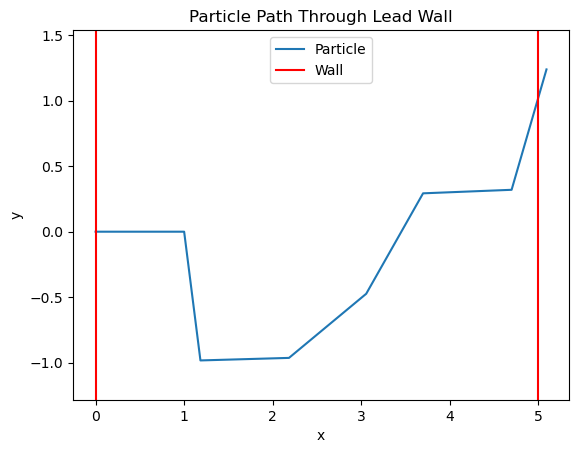

In [10]:
# xvalues=[]
# while len(xvalues) <15:
#     xvalues, yvalues = walk(0,0,15,0,True)
# print(xvalues)

xvalues, yvalues = walk(0,0,15,0,True)
while xvalues[-1]<5:   #makes sure the final value is over 5
    xvalues, yvalues = walk(0,0,15,0,True)

wall = [-10,10]
wall1 = [0,0]
wall2 = [5,5]

plt.plot(xvalues,yvalues, label="Particle")
plt.plot(wall1,wall,c='r', label="Wall")
plt.plot(wall2,wall,c='r')
plt.ylim(min(yvalues)-.3,max(yvalues)+.3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Particle Path Through Lead Wall")
plt.show()

(c) Draw the histogram of the $y$ coordinates where the neutrons exit the wall, assuming they enter at $y = 0$. Hint: should the distribution be symmetric about $\theta$? Why or why not?

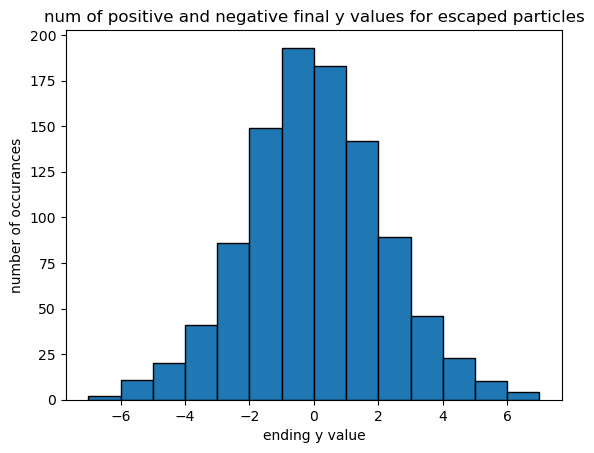

In [11]:
success = 0 
ysuc = []
while success < 1000:
    xvalues, yvalues = walk(0,0,15,0,True)
    if xvalues[-1] >= 5:
        ysuc = np.append(ysuc, yvalues[-1])
        success+=1

maxy = int(max(ysuc)) +1
miny = int(min(ysuc))-1
binsofy = np.arange(miny,maxy)
        
plt.hist(ysuc,bins=binsofy,edgecolor="black")
plt.xlabel("ending y value")
plt.ylabel("number of occurances")
plt.title("num of positive and negative final y values for escaped particles")

plt.show()

As seen above the distribution should be roughly equal between positive and negative final y values. It is random wether it goes poitive or negative for each step so when it escapes it should be equally likely that it does positive or negative but it is more likely that the value is closer to 0.

## Problem 4 Ising Model

Landau 17.4.2 (Thermodynamic properties of ferromagnetic 1-D Ising model in equilibrium) 

(a) Calculate the internal energy $U$ and the magnetization $M$ at $kT = 1$ for the chain with $N = 100$. 

In [56]:
N = 100
B = 1.
mu = .33
J = .2
k = 1.
T = 1.

random.seed()

def energy(N,B,mu,J,S):
#     term1 = 0
#     term2 = 0
    term1 = -J * np.sum(np.multiply(S[1:],S[:-1])) #multiplys S[i]*S[i+1]
    term1 += -J * S[-1]*S[0]  #gets the last term
    
#     for i in range(0,N-1):
#         term1+= -J* S[i]*S[i+1]
#     term1 += -J * S[N-1]*S[0]
    term2 = np.sum(S)  #calcs value for m
    return term1 , term2


def isingmod(N,b,mu,J,T):
    steps= N*50
    state = np.zeros((N))
    for i in range(0 ,N):  
        state[i] = 1.          # Initial spins all up, gens state  
#     boltz = 1.380649*10**(-23)
    boltz = 1 
    currentstate = state
    acc_count = 0
    Evals = []
    Mvals = []
    initial = True
    for j in range(steps):
        i = random.randint(0,N-1)
        teststate = list(currentstate)   # resets test state
        teststate[i] = teststate[i]*-1 #flips random term
        testE, testM = energy(N,b,mu,J,teststate) #calcualtes energy and mag
        if initial == True:
            currentE, currentM = energy(N,B,mu,J,currentstate) #only calcs energy the first time 
        if testE < currentE:
            currentstate = teststate
            currentE = testE
            currnetM = testM
#             print(f"accepted at i={i}")
            acc_count += 1 # a counter to see how many flip
        else:
            Edif = testE - currentE
#             Edif = currentE-testE
            R = np.exp(-Edif/(boltz*T))        #for actual calc
#             R = np.exp(-Edif)                    # for setting kT=1
            if R > random.random():
                currentstate = teststate
                currentE = testE
                currentM = testM
#                 print(f"accepted at i={i}")
                acc_count += 1
#             else:
#                 print(f"rejected at i={i}")
        Evals = np.append(Evals, currentE)
        Mvals = np.append(Mvals, currentM)
    U = np.sum(Evals/steps)
    M = np.sum(Mvals/steps)
#     print(acc_count)
    eqE = []
    eqM = []
    for i in range(len(Evals)):   
        if Evals[i] > U-20 and Evals[i] < U+20: #book says to calc U when at equilibrium 
            eqE.append(Evals[i])
#             eqM.append(Mvals[i])
    Ufin = (np.sum(eqE))/len(eqE)
#     Mfin = (np.sum(eqM))/len(eqM)
    return Ufin, M

internalE, mag =isingmod(N,B,mu,J,T)

print(f"For kT = 1 the internal energy is {internalE} and the magnatization is {mag}.")

For kT = 1 the internal energy is -4.489120000000001 and the magnatization is 0.6939999999999995.


(b) Plot the results as a function of $kT$ and check them against Figure 17.3. 

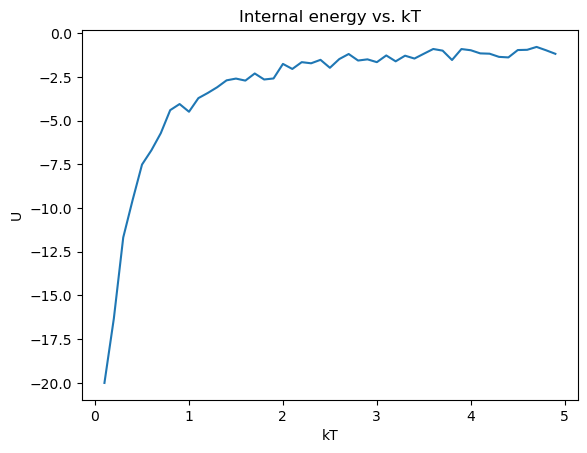

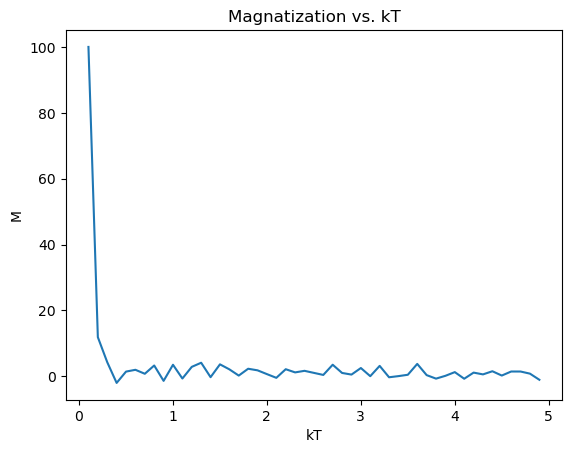

In [57]:
T_array = np.arange(.1,5,.1)
evals=np.zeros(len(T_array))
mvals=np.zeros(len(T_array))
for i in range(len(T_array)):
    evals[i], mvals[i] = isingmod(N,B,mu,J,T_array[i])
    

plt.plot(T_array,evals)
plt.title("Internal energy vs. kT")
plt.xlabel("kT")
plt.ylabel("U")
plt.show()

plt.plot(T_array,mvals)
plt.title("Magnatization vs. kT")
plt.xlabel("kT")
plt.ylabel("M")
plt.show()

While a little more jagged than the answer in 17.3 the shape of the plots are the same. The values for my plot due seem to be larger in magnitude but it is shown that in both cases the plots still fall to 0 as kT is increased. 

(c) Show that the agreement with the analytic results in Section 17.3.1 is better for $N = 2000$ than for $N = 100$.

In [59]:
# analytic_u = lambda N, J, k, T: -N*J*np.tanh(J/(k*T))
# analytic_m = lambda N, J, k, T: (N*np.e**(J/(k*T)) * np.sinh(B/(k*T)))/np.sqrt(
# N*np.e**(2*J/(k*T)) * np.sinh(B/(k*T))**2 + np.e**(-2*J/(k*T)))

def analytic_u(N,J,k,T):
    return -N*J*np.tanh(J/(k*T))

def analytic_m(N,J,k,T, B):
    return (N*np.e**(J/(k*T)) * np.sinh(B/(k*T)))/np.sqrt(N*np.e**(2*J/(k*T)) * np.sinh(B/(k*T))**2 + np.e**(-2*J/(k*T)))


N = 100
B = 1.
mu = .33
J = .2
k = 1.
T = 1.


print(f'For kT = 1:')
n_array = [100, 2000]
# n_array = [100, 500]
for N in n_array:
    print(f'     When N = {N}:')
    ana_u = analytic_u(N, J, k, T)
    ana_m = analytic_m(N, J, k, T, B)
    sim_u, sim_m  = isingmod(N,B,mu,J,T)
#     print(ana_u)
#     print(sim_u)
    print(f'U = {sim_u}, which differs from the analytic solution by {((sim_u-ana_u)/ana_u)*100}%')
    print(f'M = {sim_m}, which differs from the analytic solution by {((sim_m-ana_m)/ana_m)*100}%')

For kT = 1:
     When N = 100:
U = -3.6696, which differs from the analytic solution by -7.040049490012558%
M = 2.3396000000000003, which differs from the analytic solution by -76.56597241213706%
     When N = 2000:
U = -79.46518571700065, which differs from the analytic solution by 0.6523835229908193%
M = 56.89942, which differs from the analytic solution by 27.241318970199853%


As seen in the print out above the results above the function works much slightly better for energy calculations with N=2000 and much better for M.